# MiniProjeto 3 - Bootstrapping

## Objetivo

O objetivo deste projeto é entender e implementar o método bootstrapping. 

Problema: a amostra abaixo representa o tempo medido de abertura do software de vendas de uma empresa em minutos.

Média: 0.5453557469230769
Desvio Padrão: 0.2547555304406469


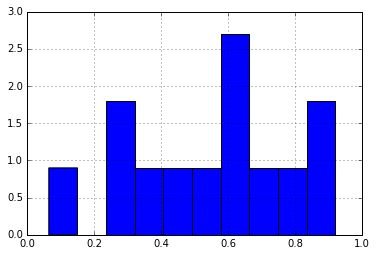

In [106]:
%matplotlib inline
import pandas as pd
from scipy.stats import *
import numpy as np
from scipy import linspace
import matplotlib.pyplot as plt

x = [0.69689142,  0.57995802,  0.06450754,  0.61206626,  0.91976314,  0.34363861,  0.82575631,  0.41666036,  
     0.62153527,  0.56757104,  0.86683518,  0.28922458,  0.28521698]

n = len(x)

print("Média: {0}".format(np.mean(x)))
print("Desvio Padrão: {0}".format(np.std(x, ddof=1)))
pd.Series(x).hist(normed=True)

Excepcionalmente hoje, os usuários estavam reclamando de lentidão no sistema, pois ao abrir o programa demorava em média 0.68 minutos com um desvio padrão de 0.27 minutos. Usando um nível de significância de 95%, podemos afirmar que há algum problema estrutural?

Para realizar o Teste de Hipóteses, temos as premissas:

$$\bar{X}=\frac{\sum_{i=1}^nX_i}{n}$$

Onde $X_i$ é uma variável aleatória de uma distribuição **desconhecida**. Se $X_i$ fosse uma normal com apenas a variância desconhecida, deveríamos utilizar o teste T. Ou ainda, se n fosse suficientemente grande, poderíamos assumir que $\bar{X}$ é normal devido ao TLC. Porém sem as premissas anteriores, devemos utilizar um método não paramétrico para realizar inferência sobre $\bar{X}$.

Bootstrapping é um método de reamostragem com reposição que consiste em recuperar a distribuição de uma medida de interesse a partir de uma amostra mestre. Com reposição significa que um mesmo elemento pode ser selecionado várias vezes, assim como outro elemento pode não ser escolhido.

Dada uma amostra aleatória $x_1, x_2,..., x_n$ de uma população qualquer, devemos sortear consecutivamente, com reposição, conjuntos de tamanho também n dessa amostra. Aplicando a medida de interesse sobre as reamostragens, teremos uma distribuição da medida desejada. E com a distribuição, podemos calcular o intervalo de confiança através dos seus percentis.

Portanto usaremos o método de Bootstrapping para responder à pergunta acima.

Este projeto é individual.

## O que deve ser feito

1. Usando a amostra mestre acima, implementar o bootstrapping para **média** e **variância**, considerando a população desconhecida. Realizar 10000 sorteios com reposição. Usar a função choice() do numpy.
2. Gerar os histogramas das amostras obtidas acima.
3. Montar o intervalo de confiança para um nível de significância de 95% bicaudal. Responder a pergunta abaixo.
3. Para efeito de comparação, considerar X como uma variável Beta de parâmetros a=2 e b=2. Sortear 10000 amostras de tamanho n e gerar os histogramas da média e da variância amostral.
4. Comentar os resultados. Há viés (bias)? Que outras medidas posso utilizar no bootstrapping?

## Entregáveis esperados e datas

Item | Data | Descrição
---|---|---
Entrega| 17/09/2016| Notebook completo com os itens descritos acima via Blackboard.


In [107]:
sel=[]
for m in range (10000):
    sel.append(np.random.choice(x,n,replace=True))
me=[]

for i in sel:
    me.append(i.mean())

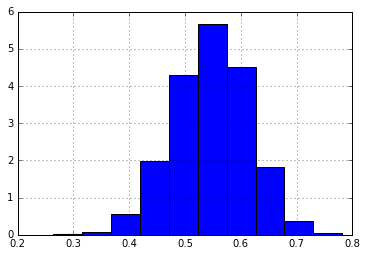

In [108]:
pd.Series(me).hist(normed=True)

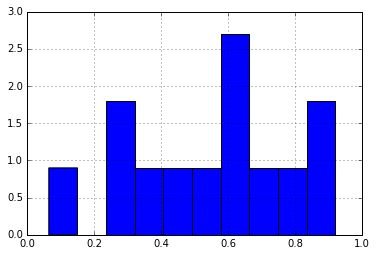

In [109]:
pd.Series(x).hist(normed=True)

In [110]:
maximo=pd.Series(me).max()
minimo=pd.Series(me).min()

In [111]:
np.percentile(me, 2.5)

0.41122572225000004

In [112]:
np.percentile(me, 97.5)

0.67422883780769227

In [113]:
sel=[]
for m in range (10000):
    sel.append(np.random.choice(x,n,replace=True))
me_var=[]

for i in sel:
    me_var.append(i.var())

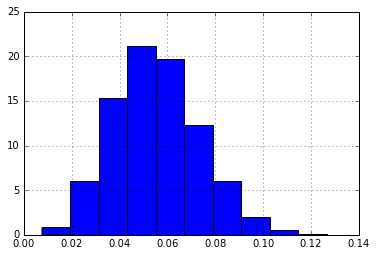

In [114]:
pd.Series(me_var).hist(normed=True)

In [115]:
np.percentile(me_var, 2.5)

0.024359182991830784

In [116]:
np.percentile(me_var, 97.5)

0.092525090716014807

In [117]:
print("Desvio Padrão: {0}".format(np.std(me, ddof=1)))

Desvio Padrão: 0.0674215621065861


In [118]:
desv_2=0.27**2
desv_2

0.0729

Média esta fora e variancia esta dentro

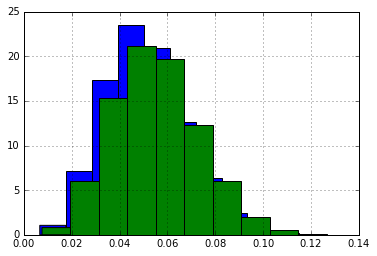

In [127]:
n = 13
matriz=beta.rvs(2,2,size=(10000,12))
va_am2=[]
for a in range (10000):
    va_am2.append(matriz[a,:].var(ddof=1))
pd.Series(va_am2).hist(normed=True)
pd.Series(me_var).hist(normed=True)

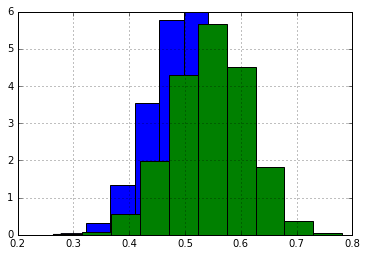

In [130]:
n = 13
matriz2=beta.rvs(2,2,size=(10000,13))
va_am=[]
for a in range (10000):
    va_am.append(matriz2[a,:].mean())
pd.Series(va_am).hist(normed=True)
pd.Series(me).hist(normed=True)

Ha viés, que podemos perceber ao colocarmos um grafio sobre o outro e percebermos um deslocamento, pois não é a população, mas sim uma amostra, que não representa fielmente a população,por ser muito pequena, se fizessemos com a população teriamos um bootstrapping, que demosntraria informações muito proximas as populações, mas conseguimos representar um formato parecido com a amostra, que apresenta informações relevantes, mas mesmo assim não podemos descartar o primeiro histograma que nos foi apresentado.


Que outras medidas posso utilizar no bootstrapping: mediana, Percentil, curtose.